<div style='background: linear-gradient(135deg, #0d1117 0%, #161b22 100%); padding: 40px; border-radius: 10px; border-left: 5px solid #a371f7;'>
  <h1 style='color: #a371f7; margin: 0; font-size: 2.5em;'>🛒 Shopping Cart Application</h1>
  <h2 style='color: #58a6ff; margin: 10px 0;'>Build Your First E-Commerce Feature</h2>
  <p style='color: #8b949e; font-size: 1.1em; margin-top: 20px;'>Master dynamic product management, cart systems, and scalable JavaScript architecture</p>
</div>

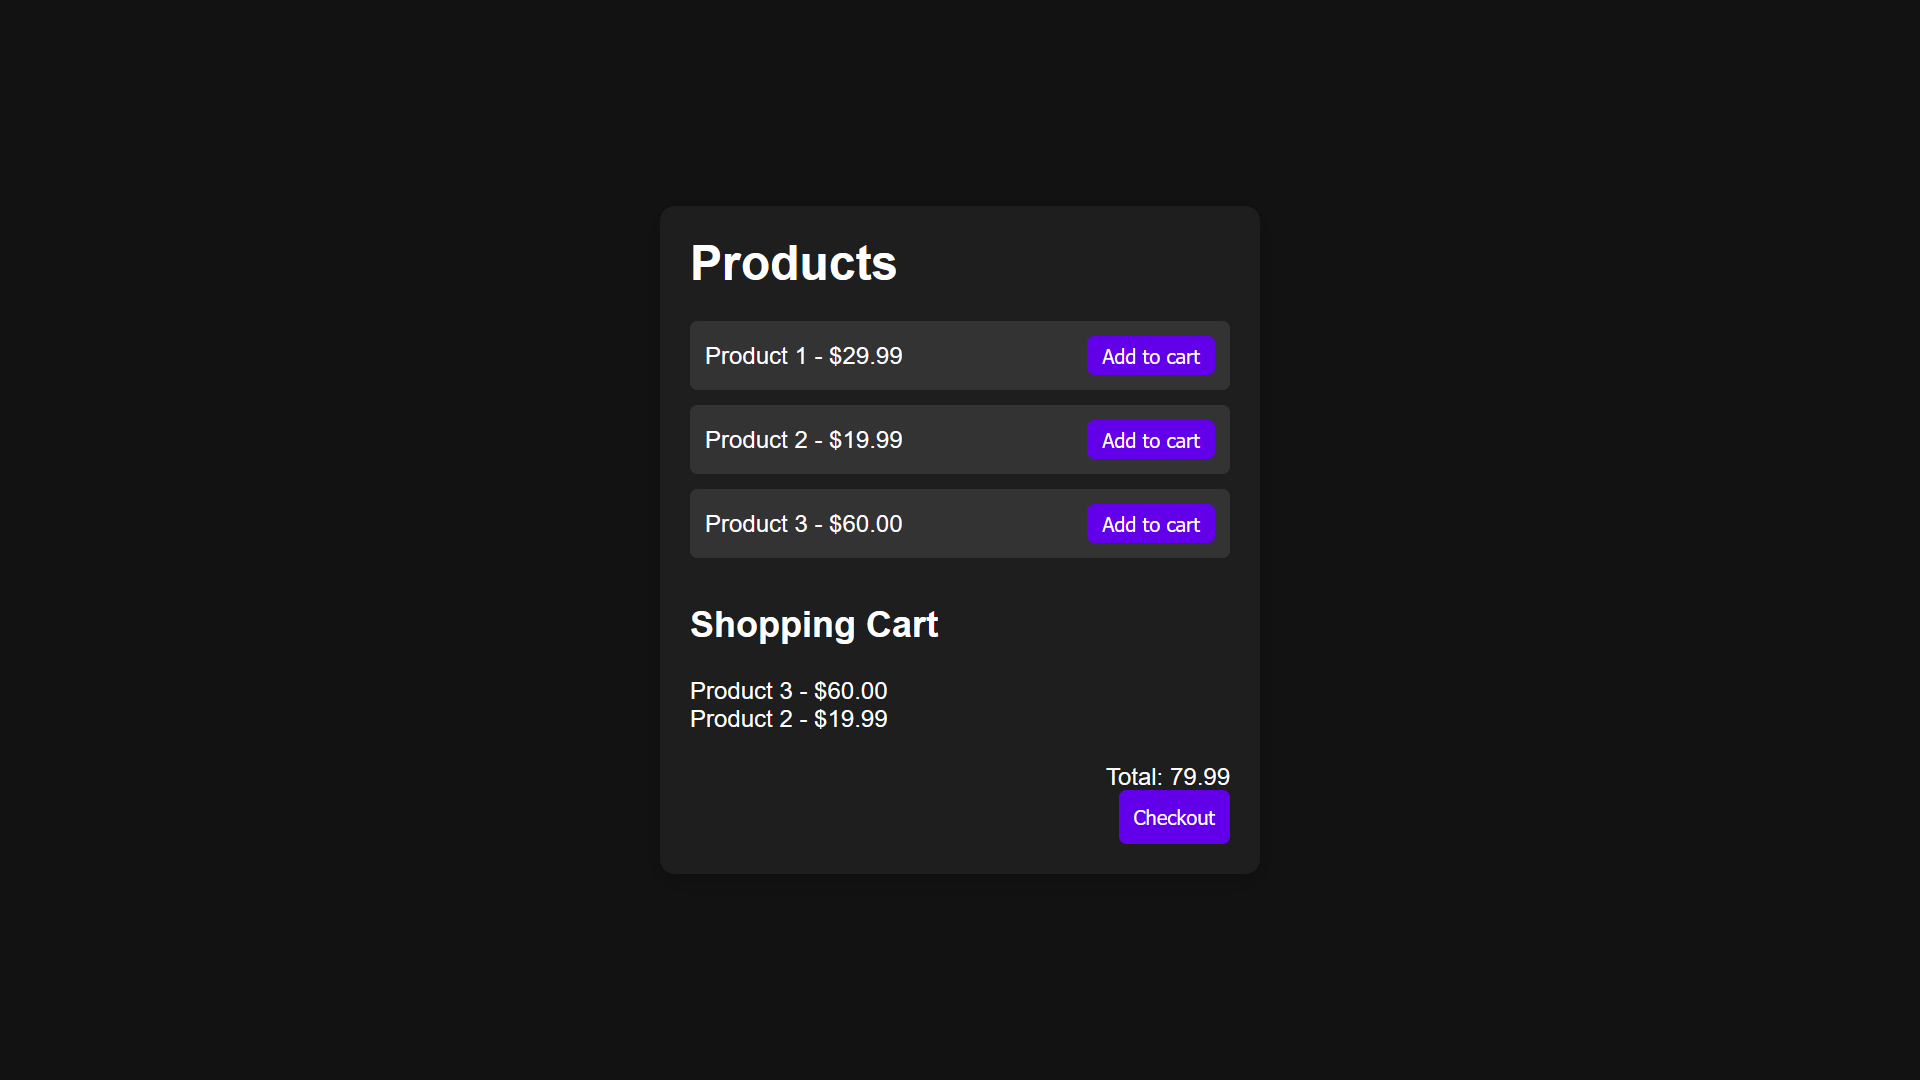
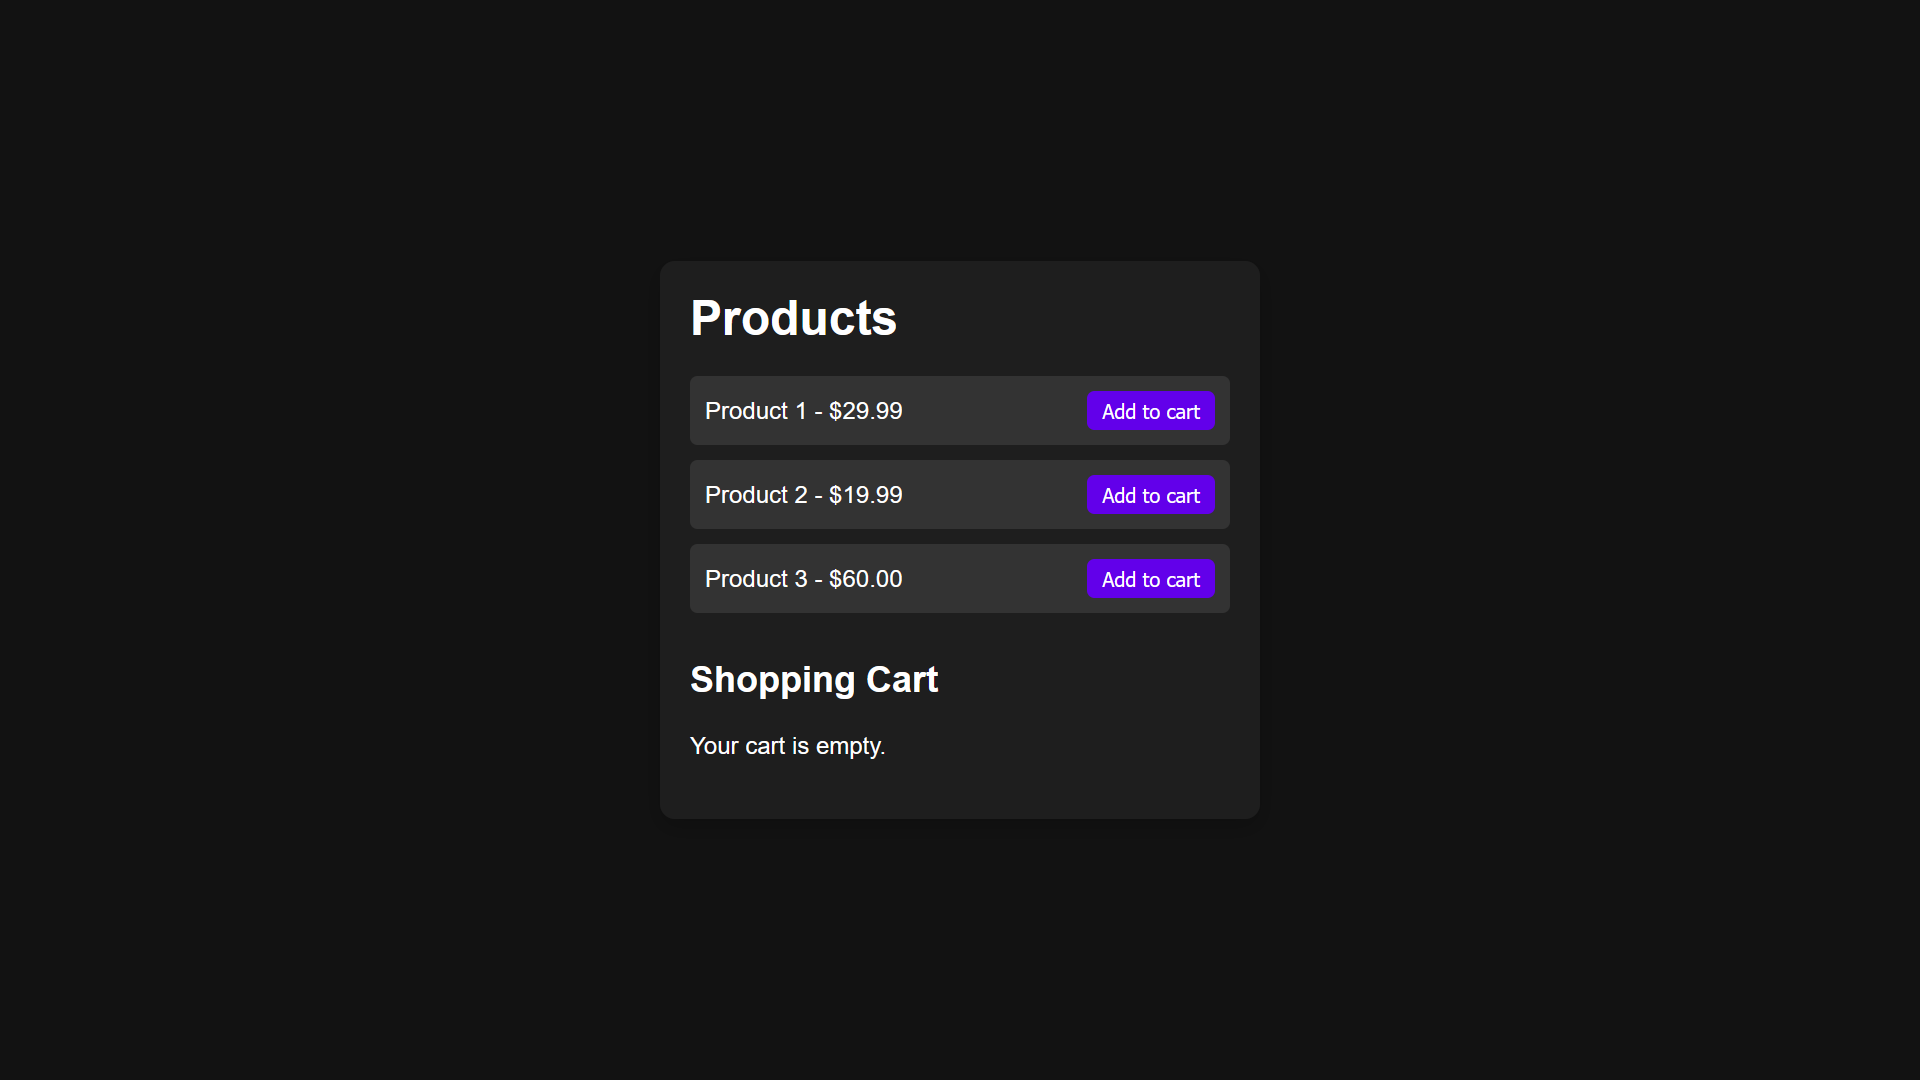

## 🎯 What You'll Master

| Skill | What You'll Learn |
|-------|------------------|
| **Dynamic Rendering** | Create HTML elements programmatically |
| **Event Delegation** | Handle clicks on dynamic elements |
| **Data Management** | Arrays, objects, and cart logic |
| **DOM Manipulation** | Add/remove classes, innerHTML |
| **Scalable Architecture** | Add 100 products with ease |
| **Price Calculation** | Total calculation with formatting |

---

# 1. Project Overview 🚀

We're building a **fully functional shopping cart** - the heart of every e-commerce site. This project teaches you patterns used by Amazon, Shopify, and every online store.

### Key Features

- Display products from a data array
- Add items to cart with button clicks
- Show cart items with prices
- Calculate total price automatically
- Handle empty cart state
- Checkout and clear cart

### Application Flow

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
┌─────────────────┐
│  Product List   │
│  (Dynamic)      │
└────────┬────────┘
         │
         │ User clicks "Add to Cart"
         ▼
┌─────────────────┐
│  Event Handler  │
│  (Delegation)   │
└────────┬────────┘
         │
         │ Find product by ID
         ▼
┌─────────────────┐
│   Cart Array    │
│   cart.push()   │
└────────┬────────┘
         │
         │ Trigger re-render
         ▼
┌─────────────────┐
│  Display Cart   │
│  + Calculate $  │
└─────────────────┘
</pre>

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #3fb950; margin: 20px 0;'>
  <h3 style='color: #3fb950; margin-top: 0;'>✨ Why This Matters</h3>
  <ul style='color: #c9d1d9;'>
    <li><strong>Scalability:</strong> Add 100 products by just adding objects to an array</li>
    <li><strong>Real-world pattern:</strong> This is how actual e-commerce sites work</li>
    <li><strong>Reusable logic:</strong> Same principles for wishlists, favorites, etc.</li>
    <li><strong>Foundation:</strong> Prepares you for React, Vue, and modern frameworks</li>
  </ul>
</div>

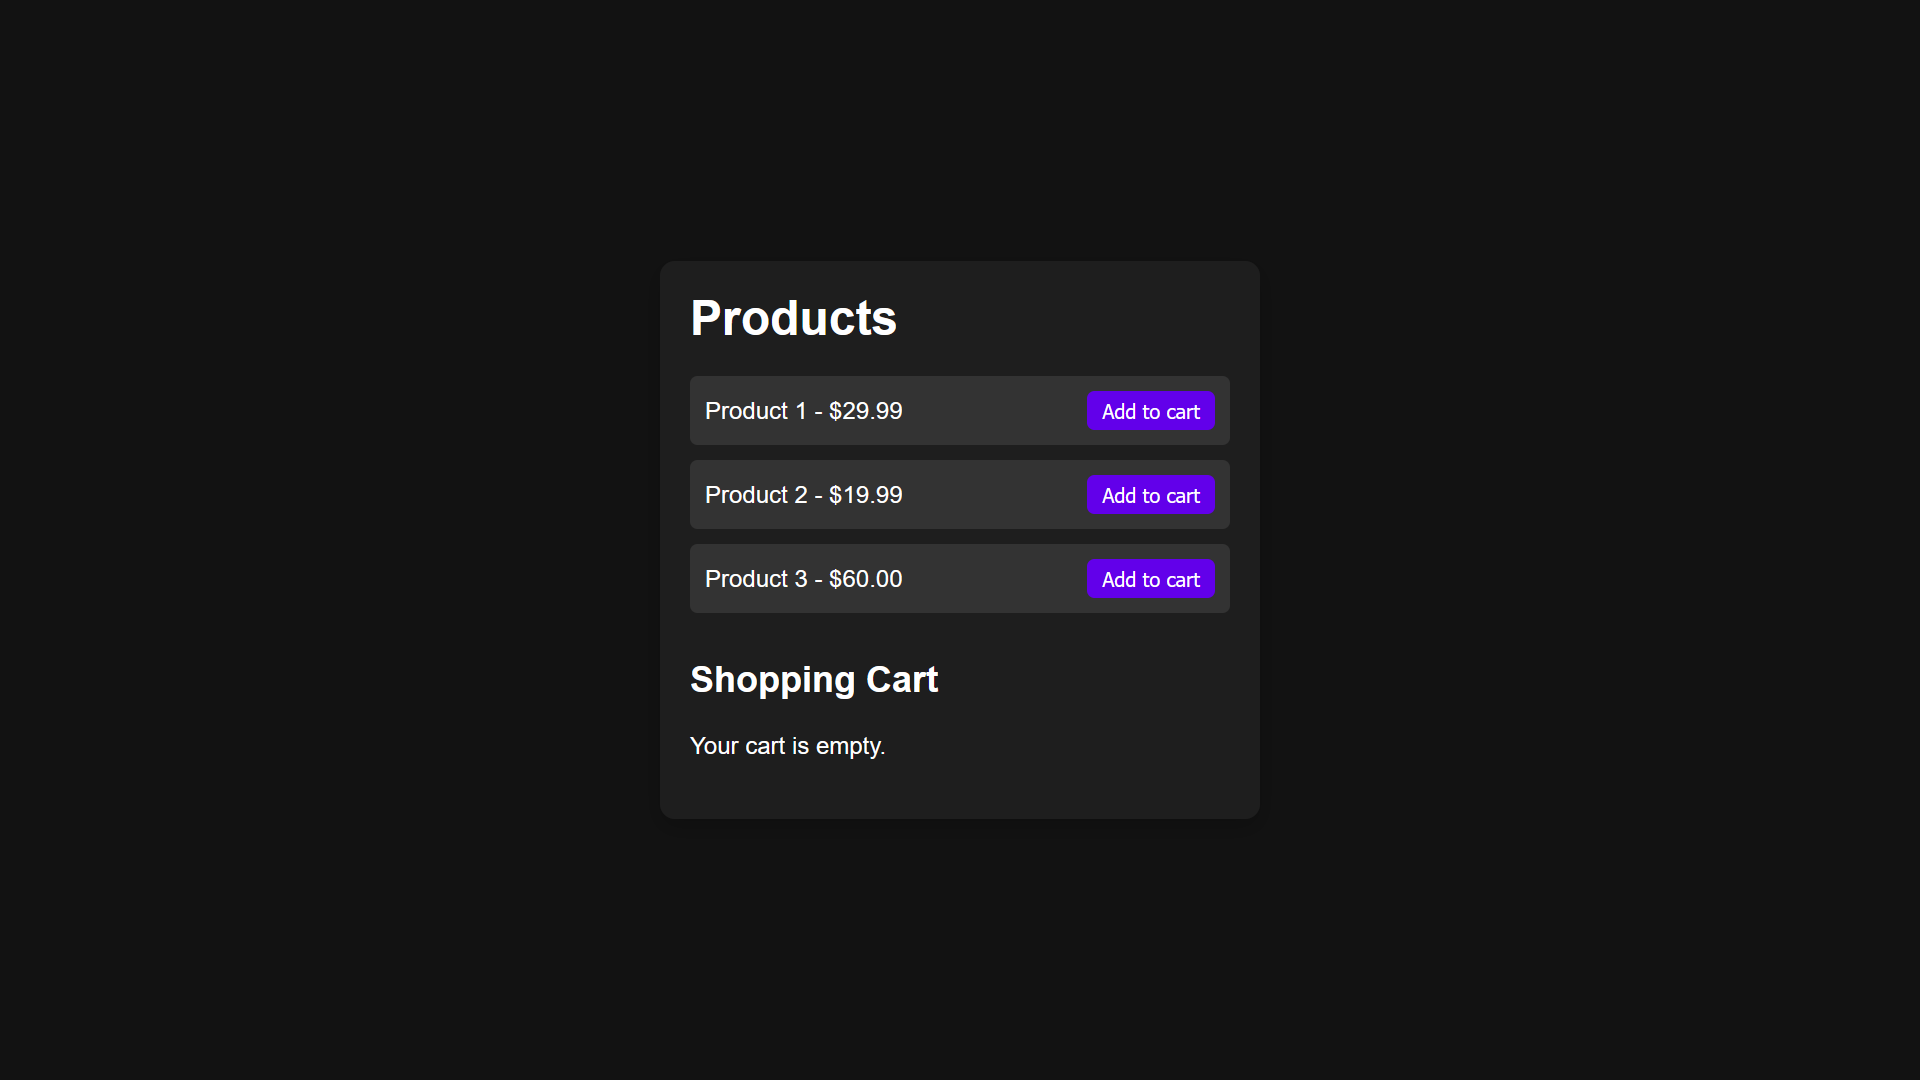

# 2. HTML Structure 📄

Our HTML is intentionally minimal - we'll build everything dynamically with JavaScript.

```html
<!-- Main Container -->
<div class="container">
  <h1>Product Shopping Cart</h1>
  
  <!-- Products will be injected here -->
  <div id="product-list"></div>
  
  <h2>Shopping Cart</h2>
  <!-- Shopping Cart -->
  <div id="cart-items">
    <p id="empty-cart">Your cart is empty</p>
  </div>
  
  <!-- Cart Total (hidden by default) -->
  <div id="cart-total" class="hidden">
    <span>Total: $<span id="total-price">0.00</span></span>
    <button id="checkout-btn">Checkout</button>
  </div>
</div>
```

### The Hidden Class

```css
.hidden {
  display: none;
}
```

We toggle visibility by adding/removing this class with JavaScript.

### DOM Structure

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
container
  |
  |--- product-list (empty initially)
  |
  |--- cart-items
  |      |
  |      |--- empty-cart (paragraph)
  |
  |--- cart-total (class: hidden)
         |
         |--- total-price (span)
         |--- checkout-btn (button)
</pre>

> 💡 **Tip:** Empty containers are perfect for dynamic content - we control everything with JavaScript!

# 3. DOM Element References 🎯

First step: grab all elements **after** the DOM loads.

```javascript
document.addEventListener('DOMContentLoaded', () => {
  // Now DOM is ready - grab all elements
  
  // Product display
  const productList = document.getElementById('product-list');
  
  // Cart elements
  const cartItems = document.getElementById('cart-items');
  const emptyCartMessage = document.getElementById('empty-cart');
  
  // Total and checkout
  const cartTotalMessage = document.getElementById('cart-total');
  const totalPriceDisplay = document.getElementById('total-price');
  const checkoutBtn = document.getElementById('checkout-btn');
  
  // All code goes here
});
```

**Output:**
```
DOM loaded! All elements accessible.
```

### Why DOMContentLoaded?

| Without DOMContentLoaded | With DOMContentLoaded |
|--------------------------|----------------------|
| Script runs before HTML loads | Script waits for HTML |
| `getElementById()` returns `null` | Elements are ready |
| Code crashes | Code works perfectly |

> 💡 **Tip:** Always use descriptive names like `totalPriceDisplay` instead of just `total` - makes debugging easier!

# 4. Product Data Structure 📦

Instead of hardcoding products in HTML, we use a **JavaScript array of objects**.

```javascript
const products = [
  {
    id: 1,
    name: 'Product 1',
    price: 29.99
  },
  {
    id: 2,
    name: 'Product 2',
    price: 19.99
  },
  {
    id: 3,
    name: 'Product 3',
    price: 59.00
  }
];

// Empty cart array
const cart = [];
```

### Data Structure Breakdown

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
products (Array)
  |
  |--- [0] Object
  |      |--- id: 1 (number)
  |      |--- name: "Product 1" (string)
  |      |--- price: 29.99 (number)
  |
  |--- [1] Object
  |      |--- id: 2
  |      |--- name: "Product 2"
  |      |--- price: 19.99
  |
  |--- [2] Object
         |--- id: 3
         |--- name: "Product 3"
         |--- price: 59.00
</pre>

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #f0883e; margin: 20px 0;'>
  <h3 style='color: #f0883e; margin-top: 0;'>⚡ Why This Structure?</h3>
  <table style='width: 100%; color: #c9d1d9;'>
    <tr>
      <td><strong>Property</strong></td>
      <td><strong>Purpose</strong></td>
    </tr>
    <tr>
      <td><code>id</code></td>
      <td>Unique identifier - critical for finding products</td>
    </tr>
    <tr>
      <td><code>name</code></td>
      <td>Display name for users</td>
    </tr>
    <tr>
      <td><code>price</code></td>
      <td>Number (not string!) for calculations</td>
    </tr>
  </table>
  <p style='color: #8b949e; margin-top: 10px;'>Add 100 products? Just add more objects to the array!</p>
</div>

# 5. Dynamic Product Rendering 🎨

We loop through the products array and create HTML elements on the fly.

```javascript
products.forEach((product) => {
  // Step 1: Create a div element
  const productDiv = document.createElement('div');
  
  // Step 2: Add a class for styling
  productDiv.classList.add('product');
  
  // Step 3: Add HTML content with template literals
  productDiv.innerHTML = `
    <span>${product.name}</span>
    <span>- $${product.price.toFixed(2)}</span>
    <button data-id="${product.id}">Add to Cart</button>
  `;
  
  // Step 4: Attach to product list
  productList.appendChild(productDiv);
});
```

**Output:**
```
Product 1 - $29.99 [Add to Cart]
Product 2 - $19.99 [Add to Cart]
Product 3 - $59.00 [Add to Cart]
```

### The Rendering Process

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
forEach Loop
    |
    |--- Iteration 1 (Product 1)
    |      |
    |      |--- createElement('div')
    |      |--- classList.add('product')
    |      |--- innerHTML = product data
    |      |--- appendChild(productDiv)
    |
    |--- Iteration 2 (Product 2)
    |      |
    |      |--- (same steps)
    |
    |--- Iteration 3 (Product 3)
           |
           |--- (same steps)
</pre>

### Key Concepts

| Method/Property | Purpose | Example |
|----------------|---------|----------|
| `document.createElement()` | Creates element in memory | `createElement('div')` |
| `classList.add()` | Adds CSS class | `classList.add('product')` |
| `innerHTML` | Sets HTML content | `innerHTML = '<span>Text</span>'` |
| `toFixed(2)` | Formats to 2 decimals | `29.9.toFixed(2)` → "29.90" |
| `data-id` | Custom attribute | Stores product ID |
| `appendChild()` | Adds to DOM | Makes element visible |

> 💡 **Tip:** `data-id="${product.id}"` stores the product ID in the button - we'll use this later to identify which product was clicked!

# 6. Event Delegation 🖱️

**Problem:** Buttons are created dynamically - how do we add event listeners to them?

**Solution:** Event Delegation - add ONE listener to the parent, filter by target.

### Event Bubbling

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
┌──────────────────────────────────┐
│  product-list (parent)           │
│  ┌────────────────────────────┐  │
│  │  Product Div               │  │
│  │  ┌──────────────────────┐  │  │
│  │  │  Button (clicked!)   │  │  │
│  │  └──────────────────────┘  │  │
│  │         │                  │  │
│  │         │ Event bubbles up │  │
│  │         ▼                  │  │
│  └────────────────────────────┘  │
│              │                   │
│              │ Caught here!      │
│              ▼                   │
│  Event Listener on parent        │
└──────────────────────────────────┘
</pre>

```javascript
// Add listener to PARENT element
productList.addEventListener('click', (event) => {
  // Filter: only respond to button clicks
  if (event.target.tagName === 'BUTTON') {
    console.log('Button clicked!');
    
    // Get product ID from data attribute
    const productId = parseInt(event.target.getAttribute('data-id'));
    
    // Find the product
    const product = products.find(p => p.id === productId);
    
    // Add to cart
    addToCart(product);
  }
});
```

**Console Output:**
```
Button clicked!
Product ID: 2
Found: {id: 2, name: "Product 2", price: 19.99}
```

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #f85149; margin: 20px 0;'>
  <h3 style='color: #f85149; margin-top: 0;'>⚠️ Critical: Type Conversion</h3>
  <p style='color: #c9d1d9;'><code>getAttribute()</code> ALWAYS returns a <strong>string</strong>!</p>
  <pre style='background: #0d1117; padding: 10px; border-radius: 4px; color: #c9d1d9;'>
const id = event.target.getAttribute('data-id');
console.log(typeof id);  // "string"
console.log(id === 1);   // false ("1" !== 1)

// Convert to number first!
const productId = parseInt(id);
console.log(typeof productId);  // "number"
console.log(productId === 1);   // true
  </pre>
</div>

### Event Delegation Flow

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
User clicks button
    |
    ▼
Event bubbles to parent
    |
    ▼
Check: event.target.tagName === 'BUTTON'?
    |
    |--- No  ----→ Ignore (clicked on div/text)
    |
    |--- Yes ----→ Continue
                   |
                   ▼
            Get data-id attribute
                   |
                   ▼
            Convert to number (parseInt)
                   |
                   ▼
            Find product in array
                   |
                   ▼
            Add to cart
</pre>

> 💡 **Tip:** `tagName` is ALWAYS uppercase: 'BUTTON', not 'button'!

# 7. Finding Products 🔍

Use the `Array.find()` method to locate the product by ID.

```javascript
// Get product ID from button (already converted to number)
const productId = parseInt(event.target.getAttribute('data-id'));

// Find the product in the array
const product = products.find((product) => {
  return product.id === productId;
});

// Shorter syntax
const product = products.find(p => p.id === productId);
```

**How find() works:**

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
productId = 2

products.find(p => p.id === productId)
    |
    |--- Check products[0]: id=1 === 2? No, continue
    |--- Check products[1]: id=2 === 2? Yes! Return this
    |
    ▼
Returns: {id: 2, name: "Product 2", price: 19.99}
</pre>

### Complete Click Handler

```javascript
productList.addEventListener('click', (event) => {
  // Step 1: Check if button was clicked
  if (event.target.tagName === 'BUTTON') {
    
    // Step 2: Get and convert product ID
    const productId = parseInt(event.target.getAttribute('data-id'));
    
    // Step 3: Find product in array
    const product = products.find(p => p.id === productId);
    
    // Step 4: Add to cart
    addToCart(product);
  }
});
```

# 8. Adding to Cart ➕

Simple function with **one job**: add product to cart array.

```javascript
function addToCart(product) {
  // Push product into cart array
  cart.push(product);
  
  // Re-render cart to show updates
  renderCart();
}
```

**What happens:**

```javascript
// Initially
cart = []

// User clicks "Add to Cart" for Product 1
addToCart({id: 1, name: 'Product 1', price: 29.99})
cart = [{id: 1, name: 'Product 1', price: 29.99}]

// User clicks "Add to Cart" for Product 2
addToCart({id: 2, name: 'Product 2', price: 19.99})
cart = [
  {id: 1, name: 'Product 1', price: 29.99},
  {id: 2, name: 'Product 2', price: 19.99}
]
```

### Function Atomicity

| Principle | Benefit |
|-----------|----------|
| One function = One job | Easy to understand |
| `addToCart()` only adds | Easy to debug |
| `renderCart()` only displays | Easy to test |
| Separated concerns | Easy to maintain |

> 💡 **Tip:** Keep functions small and focused - if a function does multiple things, split it!

# 9. Rendering the Cart 🎨

The most complex function - it handles display, calculation, and state management.

```javascript
function renderCart() {
  // Step 1: Clear existing cart display
  cartItems.innerHTML = '';
  
  // Step 2: Initialize total price
  let totalPrice = 0;
  
  // Step 3: Check if cart has items
  if (cart.length > 0) {
    // Hide empty message
    emptyCartMessage.classList.add('hidden');
    
    // Show total section
    cartTotalMessage.classList.remove('hidden');
    
    // Loop through cart items
    cart.forEach((item, index) => {
      // Add to total
      totalPrice += item.price;
      
      // Create cart item element
      const cartItem = document.createElement('div');
      cartItem.innerHTML = `
        ${item.name} - $${item.price.toFixed(2)}
      `;
      
      // Add to display
      cartItems.appendChild(cartItem);
    });
    
    // Update total price
    totalPriceDisplay.textContent = totalPrice.toFixed(2);
    
  } else {
    // Show empty message
    emptyCartMessage.classList.remove('hidden');
    
    // Hide total section
    cartTotalMessage.classList.add('hidden');
    
    // Reset total
    totalPriceDisplay.textContent = '0.00';
  }
}
```

### renderCart() Logic Flow

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
renderCart() called
    |
    |--- Clear cartItems.innerHTML
    |--- Set totalPrice = 0
    |
    ▼
Check: cart.length > 0?
    |
    |--- YES (cart has items)
    |      |
    |      |--- Hide empty message
    |      |--- Show total section
    |      |
    |      |--- forEach item in cart:
    |      |      |
    |      |      |--- totalPrice += item.price
    |      |      |--- Create div with item details
    |      |      |--- Append to cartItems
    |      |
    |      |--- Update totalPriceDisplay
    |
    |--- NO (cart empty)
           |
           |--- Show empty message
           |--- Hide total section
           |--- Set totalPriceDisplay = "0.00"
</pre>

**Output when cart has items:**
```
Product 1 - $29.99
Product 2 - $19.99
Product 3 - $59.00

Total: $108.98 [Checkout]
```

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #58a6ff; margin: 20px 0;'>
  <h3 style='color: #58a6ff; margin-top: 0;'>🔄 Why Clear innerHTML First?</h3>
  <p style='color: #c9d1d9;'><code>cartItems.innerHTML = ''</code> prevents duplicates when renderCart() is called multiple times.</p>
  <table style='width: 100%; color: #c9d1d9; margin-top: 10px;'>
    <tr>
      <th>Without Clearing</th>
      <th>With Clearing</th>
    </tr>
    <tr>
      <td>Add Product 1 → "Product 1"</td>
      <td>Add Product 1 → "Product 1"</td>
    </tr>
    <tr>
      <td>Add Product 2 → "Product 1, Product 1, Product 2" ❌</td>
      <td>Add Product 2 → "Product 1, Product 2" ✅</td>
    </tr>
  </table>
</div>

### Price Calculation Example

```javascript
// Starting point
let totalPrice = 0;

// First item
totalPrice += 29.99;  // totalPrice = 29.99

// Second item
totalPrice += 19.99;  // totalPrice = 49.98

// Third item
totalPrice += 59.00;  // totalPrice = 108.98

// Display with proper formatting
totalPriceDisplay.textContent = totalPrice.toFixed(2);  // "108.98"
```

> 💡 **Tip:** Always use `toFixed(2)` for prices to ensure consistent formatting (e.g., 29.9 → "29.90")

# 10. Checkout Functionality 💳

Clear the cart, show success message, and re-render.

```javascript
checkoutBtn.addEventListener('click', () => {
  // Clear the cart array
  cart.length = 0;
  
  // Show success message
  alert('Checkout successful!');
  
  // Re-render to show empty cart
  renderCart();
});
```

**Output:**
```
[Alert popup] Checkout successful!

Your cart is empty
```

### Ways to Clear an Array

| Method | Code | Works with const? |
|--------|------|------------------|
| Set length to 0 | `cart.length = 0` | ✅ Yes (fastest) |
| Assign new array | `cart = []` | ❌ No (requires `let`) |
| Pop all items | `while(cart.length) cart.pop()` | ✅ Yes (inefficient) |

### Checkout Flow

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
User clicks Checkout
    |
    ▼
cart.length = 0
    |
    ▼
alert("Checkout successful!")
    |
    ▼
renderCart()
    |
    ▼
cart.length = 0 (empty)
    |
    ▼
Show "Your cart is empty"
Hide total section
</pre>

> 💡 **Tip:** We use `cart.length = 0` because `cart` is declared with `const` - you can't reassign it!

# 11. Complete Code 📝

Here's the full, production-ready shopping cart application:

```javascript
document.addEventListener('DOMContentLoaded', () => {
  
  // ========== DATA ==========
  const products = [
    { id: 1, name: 'Product 1', price: 29.99 },
    { id: 2, name: 'Product 2', price: 19.99 },
    { id: 3, name: 'Product 3', price: 59.00 }
  ];
  
  const cart = [];
  
  // ========== DOM ELEMENTS ==========
  const productList = document.getElementById('product-list');
  const cartItems = document.getElementById('cart-items');
  const emptyCartMessage = document.getElementById('empty-cart');
  const cartTotalMessage = document.getElementById('cart-total');
  const totalPriceDisplay = document.getElementById('total-price');
  const checkoutBtn = document.getElementById('checkout-btn');
  
  // ========== RENDER PRODUCTS ==========
  products.forEach((product) => {
    const productDiv = document.createElement('div');
    productDiv.classList.add('product');
    productDiv.innerHTML = `
      <span>${product.name}</span>
      <span>- $${product.price.toFixed(2)}</span>
      <button data-id="${product.id}">Add to Cart</button>
    `;
    productList.appendChild(productDiv);
  });
  
  // ========== EVENT DELEGATION ==========
  productList.addEventListener('click', (event) => {
    if (event.target.tagName === 'BUTTON') {
      const productId = parseInt(event.target.getAttribute('data-id'));
      const product = products.find(p => p.id === productId);
      addToCart(product);
    }
  });
  
  // ========== ADD TO CART ==========
  function addToCart(product) {
    cart.push(product);
    renderCart();
  }
  
  // ========== RENDER CART ==========
  function renderCart() {
    cartItems.innerHTML = '';
    let totalPrice = 0;
    
    if (cart.length > 0) {
      emptyCartMessage.classList.add('hidden');
      cartTotalMessage.classList.remove('hidden');
      
      cart.forEach((item) => {
        totalPrice += item.price;
        const cartItem = document.createElement('div');
        cartItem.innerHTML = `${item.name} - $${item.price.toFixed(2)}`;
        cartItems.appendChild(cartItem);
      });
      
      totalPriceDisplay.textContent = totalPrice.toFixed(2);
    } else {
      emptyCartMessage.classList.remove('hidden');
      cartTotalMessage.classList.add('hidden');
      totalPriceDisplay.textContent = '0.00';
    }
  }
  
  // ========== CHECKOUT ==========
  checkoutBtn.addEventListener('click', () => {
    cart.length = 0;
    alert('Checkout successful!');
    renderCart();
  });
  
});
```

# 12. Assignment Challenges 🎯

Ready to level up? Try these progressive challenges:

### Level 1: Basic Enhancements

| Feature | Task |
|---------|------|
| **Item Counter** | Display total number of items (e.g., "Items: 5") |
| **Clear Cart Button** | Add button to clear cart without checkout |
| **Product Images** | Add `image` property and display images |
| **Better Styling** | Add CSS animations when items are added |

### Level 2: Intermediate Features

| Feature | Task |
|---------|------|
| **Remove Item** | Add "X" button to remove individual items |
| **Quantity Controls** | Add +/- buttons to adjust quantity |
| **LocalStorage** | Persist cart across page refreshes |
| **Search Filter** | Filter products by name |

### Level 3: Advanced Challenges

| Feature | Task |
|---------|------|
| **Discount Codes** | Implement promo code system ("SAVE10" = 10% off) |
| **Shipping Calculator** | Add shipping cost (free over $50) |
| **Tax Calculation** | Add tax based on subtotal (e.g., 8% tax) |
| **Stock Management** | Track inventory, prevent out-of-stock adds |

> 💡 **Hint:** For localStorage, save cart as JSON string on every change, load on page load!

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #a371f7; margin: 20px 0;'>
  <h3 style='color: #a371f7; margin-top: 0;'>💡 Quick Assignment Hints</h3>
  
  <h4 style='color: #58a6ff;'>LocalStorage Implementation:</h4>
  <pre style='background: #0d1117; padding: 10px; border-radius: 4px; color: #c9d1d9;'>

```javascript

// Save cart
localStorage.setItem('cart', JSON.stringify(cart));

// Load cart
const savedCart = localStorage.getItem('cart');
if (savedCart) {
  cart = JSON.parse(savedCart);
}
```
  </pre>
  
  <h4 style='color: #3fb950;'>Remove Item:</h4>
  <pre style='background: #0d1117; padding: 10px; border-radius: 4px; color: #c9d1d9;'>

  ```javascript

// Add index to each item in renderCart()
cart.forEach((item, index) => {
  cartItem.innerHTML = `
    ${item.name} - $${item.price.toFixed(2)}
    <button data-index="${index}">X</button>
  `;
});

// Remove by index
cart.splice(index, 1);
```
  </pre>
</div>

# 13. Quick Revision Table 📋

| Concept | Key Code | Purpose |
|---------|----------|----------|
| **DOM Loading** | `document.addEventListener('DOMContentLoaded', ...)` | Wait for HTML to load |
| **Create Element** | `document.createElement('div')` | Create new HTML element |
| **Add Class** | `element.classList.add('class')` | Add CSS class |
| **Remove Class** | `element.classList.remove('hidden')` | Remove CSS class |
| **Template Literal** | `` `${variable}` `` | Insert variables in strings |
| **Event Delegation** | `parent.addEventListener('click', ...)` | Handle dynamic elements |
| **Check Element** | `event.target.tagName === 'BUTTON'` | Filter event target |
| **Get Attribute** | `element.getAttribute('data-id')` | Get custom attribute |
| **Type Conversion** | `parseInt(string)` | String to number |
| **Find in Array** | `array.find(item => item.id === id)` | Find matching item |
| **Add to Array** | `array.push(item)` | Add item to end |
| **Clear Array** | `array.length = 0` | Empty the array |
| **Format Price** | `price.toFixed(2)` | 2 decimal places |
| **Clear HTML** | `element.innerHTML = ''` | Remove all children |
| **Loop Array** | `array.forEach((item, index) => {})` | Iterate with index |

# 14. Memory Tricks 🧠

### The 4 R's of Cart Management

1. **R**ender Products → Loop and create divs
2. **R**etrieve Product → Find using data-id
3. **R**egister in Cart → Push to cart array
4. **R**e-render Cart → Show updated items

### Event Delegation Mantra

*"Listen on the parent, filter by the target, act on the data"*

### Type Conversion Rule

*"Attributes are ALWAYS strings - convert before comparing!"*

### Common Mistakes to Avoid

| Mistake | Fix |
|---------|-----|
| Forgetting `parseInt()` on data-id | Always convert: `parseInt(getAttribute('data-id'))` |
| Not clearing `innerHTML` | Always clear before re-rendering |
| Adding listeners to dynamic elements | Use event delegation on parent |
| Forgetting `toFixed(2)` | Always format prices for consistency |
| Using `cart = []` with `const` | Use `cart.length = 0` instead |

# 15. One-Liners to Remember 💎

**On Scalability:**
> *"Array-driven UI: change data, UI follows automatically"*

**On Event Delegation:**
> *"One listener for all buttons, past and future"*

**On Functions:**
> *"One function, one job, zero confusion"*

**On Data Attributes:**
> *"data-* attributes: the bridge between HTML and JavaScript"*

**On Type Safety:**
> *"Trust DOM attributes like you trust user input - validate everything"*

**On State Management:**
> *"Cart is the source of truth, UI is just a reflection"*

**On Clearing:**
> *"Clear first, render second, duplicates never"*

**On Price Formatting:**
> *"Money has two decimals, always - toFixed(2) is your friend"*

**On Learning:**
> *"Build a cart, understand e-commerce; master the cart, build anything"*

---

<div style='background: linear-gradient(135deg, #0d1117 0%, #161b22 100%); padding: 40px; border-radius: 10px; border: 2px solid #3fb950; margin: 30px 0; text-align: center;'>
  <h2 style='color: #3fb950; margin: 0; font-size: 2em;'>🎉 You've Built a Shopping Cart!</h2>
  <p style='color: #c9d1d9; font-size: 1.2em; margin: 20px 0;'>From zero to e-commerce hero</p>
  
  <div style='background: #0d1117; padding: 20px; border-radius: 8px; margin: 20px 0;'>
    <h3 style='color: #58a6ff;'>Skills Unlocked:</h3>
    <p style='color: #8b949e;'>
      ✓ Dynamic DOM Manipulation | ✓ Event Delegation<br>
      ✓ Array Methods | ✓ Data Attributes<br>
      ✓ State Management | ✓ Scalable Architecture
    </p>
  </div>
  
  <p style='color: #a371f7; font-size: 1.1em; margin-top: 20px;'>Now tackle those assignments and build something amazing! 🚀</p>
</div>

### Next Steps

1. **Practice** - Build the cart from scratch without looking
2. **Enhance** - Complete Level 1 assignments
3. **Challenge** - Try Level 2 and 3 features
4. **Share** - Deploy your cart and show it off
5. **Iterate** - Add your own creative features

> 💡 **Remember:** Every e-commerce site started with a simple cart. You've mastered the foundation!